<a href="https://colab.research.google.com/github/20rashmi128/NYC2019-Airbnb-Bookings-Analysis/blob/main/Notebook_Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb Bookings Analysis (EDA)**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as :
  What can we learn about different hosts and areas?
  What can we learn from predictions? (ex: locations, prices, reviews, etc)
  Which hosts are the busiest and why?
  Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# 1. Basic Information about Dataset

### 1.(a) Imported relevant python libraries and then loaded the dataset csv file using Pandas.

In [2]:
# Importing relevant libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Mounted the google drive 
# creating a variable to store path address of required dataset file and then, reading csv file using pandas to a dataframe.

path = '/content/drive/MyDrive/EDA_AirBnB/Copy of Airbnb NYC 2019.csv'
df = pd.read_csv(path)

### 1.(b) Getting basic details/information about the data, its columns and respective data types.


In [59]:
df.id.nunique(), len(df)

(48895, 48895)

In [64]:
df.host_id.nunique(), df[['host_id']].isnull().sum()

(37457, host_id    0
 dtype: int64)

In [56]:
# a peek into our dataset using df.head()
df.head()

#  Observations:-
#  1. The dataset looks as per the problem statement and it contains relevant details about Airbnb property listings 
#     such as listing id, listing name along with host details, room details, prices and availability for booking.
#  2. One row entry has 0 as number of reviews and corresponding last review & reviews per month are missing values.
#  3. One row entry has 0 against column for availability days for booking.
#  4. last review column contains the date of the last review which is of str dtype. so needs to be converted to datetime format.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Getting all column names at once for a better idea/understanding of the dataset.
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#  Getting the data type of each column data.
for column in df.columns:
  print("Column",' "',column,'" ', "is of -", type(df.loc[0,column]), "data type")

Column  " id "  is of - <class 'numpy.int64'> data type
Column  " name "  is of - <class 'str'> data type
Column  " host_id "  is of - <class 'numpy.int64'> data type
Column  " host_name "  is of - <class 'str'> data type
Column  " neighbourhood_group "  is of - <class 'str'> data type
Column  " neighbourhood "  is of - <class 'str'> data type
Column  " latitude "  is of - <class 'numpy.float64'> data type
Column  " longitude "  is of - <class 'numpy.float64'> data type
Column  " room_type "  is of - <class 'str'> data type
Column  " price "  is of - <class 'numpy.int64'> data type
Column  " minimum_nights "  is of - <class 'numpy.int64'> data type
Column  " number_of_reviews "  is of - <class 'numpy.int64'> data type
Column  " last_review "  is of - <class 'str'> data type
Column  " reviews_per_month "  is of - <class 'numpy.float64'> data type
Column  " calculated_host_listings_count "  is of - <class 'numpy.int64'> data type
Column  " availability_365 "  is of - <class 'numpy.int64'

A) Observations:-


*   Total 16 columns, out of which 10 are numerical columns (either integer type or float type data) and remaining 6 columns have string type data.
*   Total data/rows available is 48,895 entries.

In [8]:
#  checking the last 5 rows of dataset
df.tail()

# Observations -
# All last 5 entries have 0 number of reviews and have missing values for columns "last_review" and "reviews_per_month".


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### 1.(c) Renaming few columns for better clarity

In [78]:
df.rename(columns = {'id':'property_id','name':'property_name','price':'price_dollar'}, inplace = True)
df.head(2)

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_dollar,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


### 1.(d) Descriptive statistical analysis of Numerical type columns/features.

In [81]:
# checking the descriptive statistic parameters for the numerical columns of dataset such as mean, mode etc.
df.describe()

# Observations:-
# 1. reviews_per_month seems to have few missing values.
# 2. Rest all 9 numerical columns have no missing value.
# 3. Minimum value in price_dollar column is 0$ and max is 10,000$. (Explain 0$)
# 4. There is/are properties whose number of reviews is 0 (i.e., no reviews present).
# 5. There is/are properties whose days' availability for booking is 0 day. (Explain)

,property_id,host_id,latitude,longitude,price_dollar,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [84]:
print("Total number of unique listings:", df.property_id.nunique())

Total number of unique listings: 48895


In [85]:
# Using describe method for categorical features to get a broad idea about dataset.
# it gives the count, unique, top (most frequent value), and corresponding frequency of remaining columns. 

df.describe(include=['O'])

,property_name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Observations:-
1. Each row/data entry has been uniquely defined by unique property id.
2. There are total 5 unique neighbourhood groups and total 221 unique neighbourhood locations.
3. There are 3 unique types of rooms.

# 2. Data Preparation & Cleaning

## Steps followed:-
   2. Checking for Missing values and Unique Values of each column.
   3. Handling Missing Values
   4. Checking duplicate values
   5. Checking Outlierrs and handling outliers (if any).
   6. If any column/feature seems to be of zero importance, drop those columns.

# 1. Converting the last_review_dates from string data type to datetime without timestamp.

In [86]:
#  Converting the last_review column data to datetime format without timestamp.

# Creating new column with last_review data converted to datetime with timestamp format.
df['date_col'] = pd.to_datetime(df.last_review)

# Creating new column with just the date part without timestamp.
df['last_review_date'] = df['date_col'].dt.date
df['last_review_date']

0        2018-10-19
1        2019-05-21
2               NaT
3        2019-07-05
4        2018-11-19
            ...    
48890           NaT
48891           NaT
48892           NaT
48893           NaT
48894           NaT
Name: last_review_date, Length: 48895, dtype: object

In [87]:
# dropping the other column
df.drop(['date_col'], axis =1, inplace = True)

# 2. Checking and Handling Missing Values

In [88]:
# checking for missing values against each column of the dataset
df.isnull().sum()

property_id                           0
property_name                        16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price_dollar                          0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
last_review_date                  10052
dtype: int64

In [89]:
# Percentages of missing values per column
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

last_review_date                  0.205583
reviews_per_month                 0.205583
last_review                       0.205583
host_name                         0.000429
property_name                     0.000327
minimum_nights                    0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
property_id                       0.000000
price_dollar                      0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
room_type                         0.000000
dtype: float64

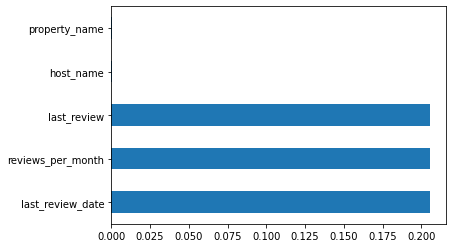

In [90]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

# Properties with 0 days of availabilty for booking purpose.

In [93]:
df['availability_365'].min(),df['availability_365'].max()

(0, 365)

In [94]:
#  checking the number of entries whose availability of days for booking out of 365 days is zero. 
# So, these properties are listed/active on Airbnb, but are not available for booking the year the data was collected.
print( "The number of AirBnB properties which are not available for booking this year is", len(df[df['availability_365']==0]))
print( "The number of AirBnB properties which are available for booking all 365 days this year is", len(df[df['availability_365']==365]))

The number of AirBnB properties which are not available for booking this year is 17533
The number of AirBnB properties which are available for booking all 365 days this year is 1295


# Properties having zero Reviews

In [95]:
#  Getting the name and total count of those properties, for which users have not given reviews.
null_rvw_df = df[df['number_of_reviews']==0]
print("The below",len(null_rvw_df), "properties have zero reviews:", '\n', null_rvw_df['property_name'].unique())

The below 10052 properties have zero reviews: 
 ['THE VILLAGE OF HARLEM....NEW YORK !' 'Huge 2 BR Upper East  Cental Park'
 'Magnifique Suite au N de Manhattan - vue Cloitres' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]


In [96]:
# check the logical deduction that 0 reviews must be accompanied by NaN last review and NaN reviews_per_months. 

print(null_rvw_df['reviews_per_month'].unique())
print(null_rvw_df['last_review_date'].unique())

# Observation:
# Yes. So, these missing values are natural and so, need no treatment.

[nan]
[NaT]


# 3. Data Exploration and Visulaization

## Columns to analyse:-
1. Duplicate property names.
2. Host_id, host_name and property_name
3. Neighbourhood area and location 

## Univariate Analysis/ Visualization:-

In [97]:
df.columns

Index(['property_id', 'property_name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price_dollar', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_review_date'],
      dtype='object')

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

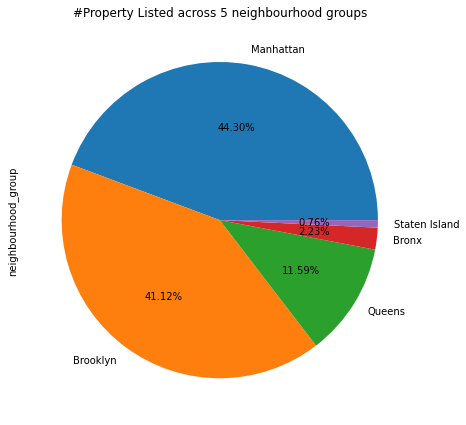

In [98]:
# Pie chart to show the distribution of properties across different neighbourhood groups of New York.

plt.subplot(211)
df['neighbourhood_group'].value_counts().plot(kind='pie', title='#Property Listed across 5 neighbourhood groups', figsize=(22,16),autopct='%.2f%%')
plt.xticks(rotation=0)

# observation:
# Maximum number of property listings are in Manhattan (44.30%) and then Brooklyn(41.12%).
# Minimum number of property listed is in Staten Island(0.76%).

In [99]:
# Count of properties across 5 neighbourhood groups.
df.groupby(['neighbourhood_group']).size().reset_index(name='properties_count')

,neighbourhood_group,properties_count
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


In [100]:
# Within each neighbourhood group, checking the count of properties by their neighbourhood locations.
area_df = df.groupby(['neighbourhood_group','neighbourhood']).size().reset_index(name='properties_count2')
area_df

,neighbourhood_group,neighbourhood,properties_count2
0,Bronx,Allerton,42
1,Bronx,Baychester,7
2,Bronx,Belmont,24
3,Bronx,Bronxdale,19
4,Bronx,Castle Hill,9
...,...,...,...
216,Staten Island,Tottenville,7
217,Staten Island,West Brighton,18
218,Staten Island,Westerleigh,2
219,Staten Island,Willowbrook,1


In [101]:
print('In Bronx, properties are listed at total',area_df[area_df['neighbourhood_group']=='Bronx'].properties_count2.count(),'locations.')
print('In Staten Island, properties are listed at total',area_df[area_df['neighbourhood_group']=='Staten Island'].properties_count2.count(),'locations.')
print('In Queens, properties are listed at total',area_df[area_df['neighbourhood_group']=='Queens'].properties_count2.count(),'locations.')
print('In Manhattan, properties are listed at total',area_df[area_df['neighbourhood_group']=='Manhattan'].properties_count2.count(),'locations.')
print('In Brooklyn, properties are listed at total',area_df[area_df['neighbourhood_group']=='Brooklyn'].properties_count2.count(),'locations.')

In Bronx, properties are listed at total 48 locations.
In Staten Island, properties are listed at total 43 locations.
In Queens, properties are listed at total 51 locations.
In Manhattan, properties are listed at total 32 locations.
In Brooklyn, properties are listed at total 47 locations.


In [ ]:
# top 5 locations with max property counts among all 5 neighbour hood and also under respective group???


In [ ]:
# # trying to plot properties of different room typees in 5 n-groups.
# area_df1.plot(x='neighbourhood_group',kind='bar', stacked=False, title='Grouped Bar Graph with dataframe')

In [102]:
area_df1 = df.groupby(['neighbourhood_group','room_type']).size().reset_index(name='properties_count4')
area_df1

,neighbourhood_group,room_type,properties_count4
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


In [103]:
# Checking the count of properties of different room types.
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

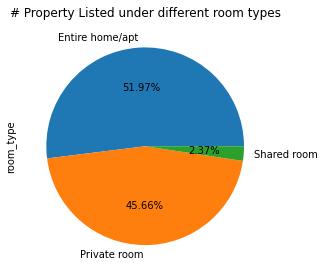

In [104]:
# Plotting a pie chart for better visualization.
plt.subplot(212)
df['room_type'].value_counts().plot(kind='pie', title='# Property Listed under different room types', figsize=(14,10),autopct='%.2f%%')
plt.xticks(rotation=0)

# observation:
# Maximum number of property listings are of "Entire home/apt" room type.
# Minimum number of property listed are of "Shared room" type.

In [105]:
# Checking the count of properties of different room types by their respective neighbourhood group.
room_df=df.groupby(['neighbourhood_group','room_type','price_dollar']).size().reset_index(name='properties_count3')
room_df

,neighbourhood_group,room_type,price_dollar,properties_count3
0,Bronx,Entire home/apt,28,1
1,Bronx,Entire home/apt,35,1
2,Bronx,Entire home/apt,37,1
3,Bronx,Entire home/apt,39,1
4,Bronx,Entire home/apt,40,3
...,...,...,...,...
2446,Staten Island,Shared room,29,1
2447,Staten Island,Shared room,30,2
2448,Staten Island,Shared room,75,2
2449,Staten Island,Shared room,95,1


In [106]:
# Average price of rooms in different neighbourhood groups.
room_df.groupby(['neighbourhood_group']).price_dollar.mean()

neighbourhood_group
Bronx            140.534562
Brooklyn         372.417034
Manhattan        523.627033
Queens           212.130536
Staten Island    166.500000
Name: price_dollar, dtype: float64

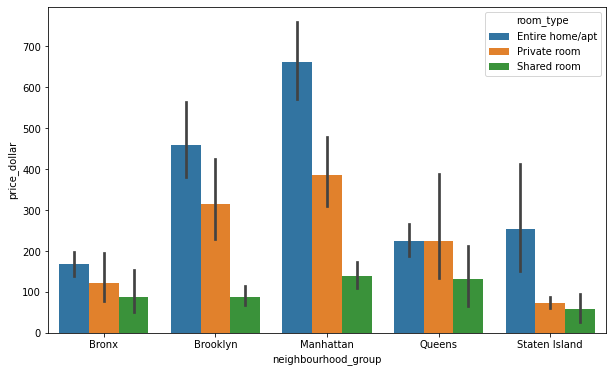

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price_dollar',hue='room_type',data=room_df)

In [108]:
room_df.groupby(['neighbourhood_group']).room_type.value_counts()

neighbourhood_group  room_type      
Bronx                Entire home/apt    107
                     Private room        83
                     Shared room         27
Brooklyn             Entire home/apt    389
                     Private room       219
                     Shared room         73
Manhattan            Entire home/apt    571
                     Private room       321
                     Shared room         92
Queens               Entire home/apt    223
                     Private room       148
                     Shared room         58
Staten Island        Entire home/apt     73
                     Private room        60
                     Shared room          7
Name: room_type, dtype: int64

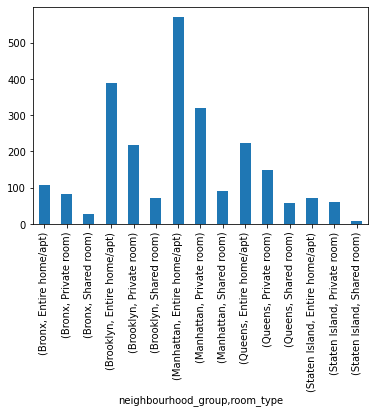

In [109]:
# Plotting a barplot to visualize the distribution of properties of different room types by respective neighbourhood group.
room_df.groupby(['neighbourhood_group']).room_type.value_counts().plot(kind='bar')

#  Observation :
# All 5 areas have least number of Shared room type properties among 3 room types.
# In Manhattan, maximum properties are of Entirehome/apt type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


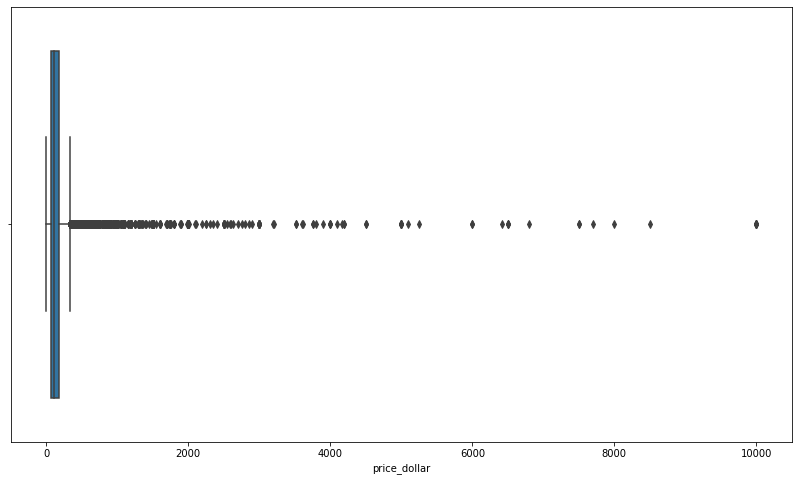

In [110]:
# Numerical columns
# price_dollar
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(df['price_dollar'])

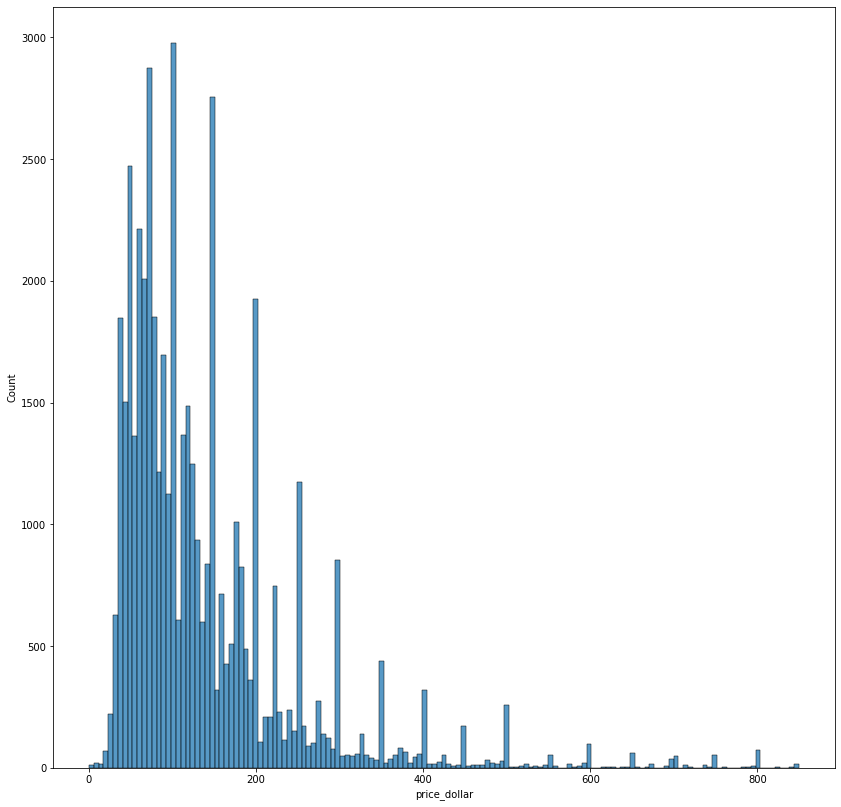

In [111]:
# price_dollar
fig, ax = plt.subplots(figsize=(14, 14))
sns.histplot(df['price_dollar'].sort_values()[:48500])

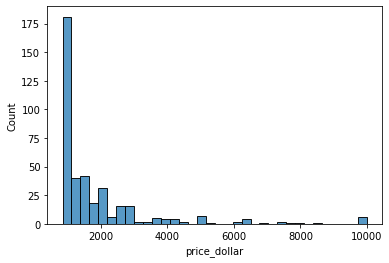

In [112]:
sns.histplot(df['price_dollar'].sort_values()[48500:])

In [113]:
print("% of properties with price more than 100$:", (len(df[df['price_dollar'] > 100])/len(df))*100)
print("% of properties with price more than 200$:", (len(df[df['price_dollar'] > 200])/len(df))*100)
print("% of properties with price more than 300$:", (len(df[df['price_dollar'] > 300])/len(df))*100)
print("% of properties with price more than 400$:", (len(df[df['price_dollar'] > 400])/len(df))*100)
print("% of properties with price more than 500$:", (len(df[df['price_dollar'] > 500])/len(df))*100)
print("% of properties with price more than 600$:", (len(df[df['price_dollar'] > 600])/len(df))*100)
print("% of properties with price more than 700$:", (len(df[df['price_dollar'] > 700])/len(df))*100)

% of properties with price more than 100$: 51.06248082626036
% of properties with price more than 200$: 17.146947540648327
% of properties with price more than 300$: 6.865732692504347
% of properties with price more than 400$: 3.6056856529297474
% of properties with price more than 500$: 2.1351876469986704
% of properties with price more than 600$: 1.59116474077104
% of properties with price more than 700$: 1.2046221495040395


In [114]:
df.columns

Index(['property_id', 'property_name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price_dollar', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_review_date'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


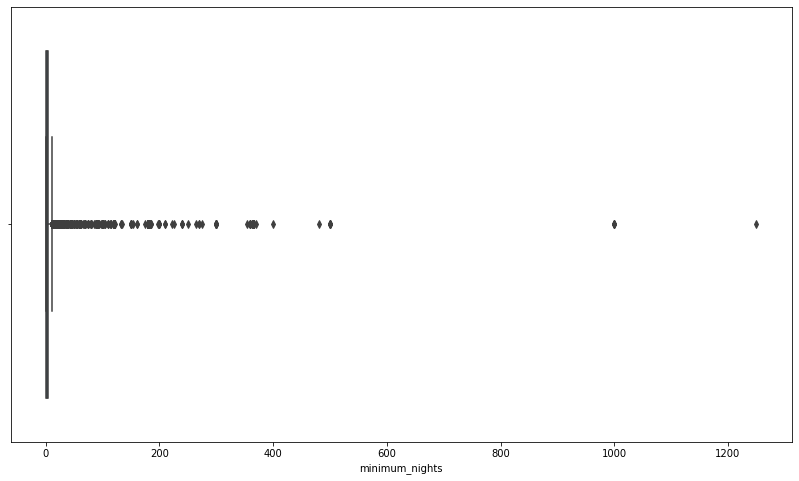

In [115]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(df['minimum_nights'])

In [116]:
len(df[df['minimum_nights']>30])/len(df)

0.015277635750076695

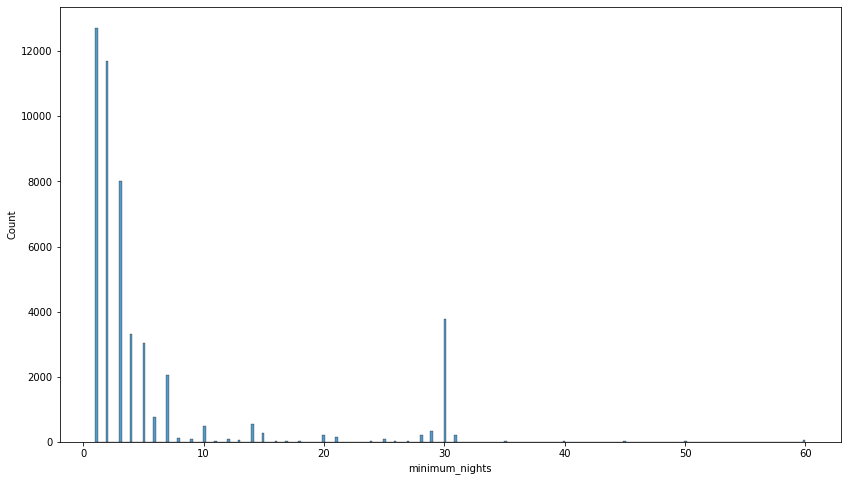

In [117]:
# Numerical columns
# minimum_nights

fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(df['minimum_nights'].sort_values()[:48500])

# 1. Duplicate Property Names

In [118]:
print("#unique values in 'property_id' column:", df.property_id.nunique())
print("#unique values in 'property_name' column:", df.property_name.nunique())

#unique values in 'property_id' column: 48895
#unique values in 'property_name' column: 47905


In [119]:
duplicate_property = df[df.duplicated(subset=['property_name'])]
print("The number of properting listings' names which are duplicate is",duplicate_property.property_name.nunique())
duplicate_property[3:12]

The number of properting listings' names which are duplicate is 645


,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_dollar,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
661,250537,The Lenox in Harlem,1313306,Yvette,Manhattan,Harlem,40.81122,-73.94279,Entire home/apt,400,5,0,NaN,NaN,2,365,NaT
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84,2018-11-06
670,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60,2019-06-24
674,253800,Loft Suite @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73730,-73.95323,Entire home/apt,199,3,24,2019-04-25,0.26,28,60,2019-04-25
675,253803,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73708,-73.95271,Entire home/apt,199,3,23,2019-06-22,0.26,28,60,2019-06-22
676,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73652,-73.95236,Entire home/apt,199,3,43,2019-07-02,0.47,28,60,2019-07-02
677,253811,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73693,-73.95316,Entire home/apt,199,3,30,2019-07-03,0.32,28,56,2019-07-03
678,253815,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73784,-73.95324,Entire home/apt,199,3,39,2019-06-29,0.44,28,84,2019-06-29
679,253828,Duplex w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73674,-73.95247,Private room,349,3,8,2018-07-26,0.09,28,58,2018-07-26


# 2. Information regarding Duplicate Hosts and thier multiple Listings

In [120]:
#  missing values in host_id, host_name
print("Number of missing values in host_id column:", df.host_id.isnull().sum())
print("Number of unique values in 'host_id' column:", df.host_id.nunique())
print(" ")
print("Number of missing values in host_name column:", df.host_name.isnull().sum())
print("Number of unique values in 'host_name' column:", df.host_name.nunique())

Number of missing values in host_id column: 0
Number of unique values in 'host_id' column: 37457
 
Number of missing values in host_name column: 21
Number of unique values in 'host_name' column: 11452


In [121]:
duplicate_hosts = df[df['host_id'].duplicated()]

print("The number of Duplicate hosts are :", duplicate_hosts['host_id'].nunique())
print("The number of Duplicate host names are :", duplicate_hosts['host_name'].nunique())
print("The total proerties managed by these duplicate hosts are:", len(duplicate_hosts))
print(" ")
print("05 Duplicate hosts are :")
duplicate_hosts[:5]

The number of Duplicate hosts are : 5154
The number of Duplicate host names are : 2942
The total proerties managed by these duplicate hosts are: 11438
 
05 Duplicate hosts are :


,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_dollar,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364,2019-01-01
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304,2019-07-02
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359,2019-07-01
35,10962,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,168,2019-06-21,1.41,3,340,2019-06-21
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,2019-07-05,1.81,4,188,2019-07-05


In [122]:
df[df.host_id == 7549]

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_dollar,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,2019-06-09
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,2019-07-05,1.81,4,188,2019-07-05
4767,3373030,"Cute,Cozy Lower East Side 1bdrm",7549,Ben,Manhattan,Lower East Side,40.71307,-73.99025,Entire home/apt,150,1,60,2019-06-25,1.00,4,188,2019-06-25
5778,4215595,LowerEastSide apt share shortterm 3,7549,Ben,Manhattan,Lower East Side,40.71329,-73.99047,Shared room,40,1,88,2019-05-19,1.53,4,197,2019-05-19


In [123]:
df[df.host_id == 32294]

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_dollar,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355,2019-06-01
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359,2019-07-01
100,22918,loft bed - near transportation-15min to times sq,32294,Ssameer Or Trip,Manhattan,Harlem,40.82279,-73.95139,Private room,60,3,11,2019-01-03,0.87,3,219,2019-01-03


In [124]:
df[df.host_id == 9744]

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_dollar,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,2019-06-24
35,10962,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,168,2019-06-21,1.41,3,340,2019-06-21
192,50447,Lovely Apt & Garden; Legal; Best Area; Ameni...,9744,Laurie,Brooklyn,South Slope,40.66930,-73.98804,Entire home/apt,135,5,151,2019-06-22,1.43,3,162,2019-06-22


In [125]:
df[df.host_id == 22486]

,property_id,property_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price_dollar,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date
21,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,2019-07-01,1.09,6,347,2019-07-01
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364,2019-01-01
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304,2019-07-02
476,167222,CBG# 4Tiny room w/ huge window/AC,22486,Lisel,Brooklyn,Park Slope,40.67880,-73.97643,Private room,60,1,20,2018-08-24,0.21,6,258,2018-08-24
588,222054,CBG Helps Haiti Rm #3,22486,Lisel,Brooklyn,Park Slope,40.68012,-73.97847,Private room,120,2,23,2018-09-15,0.24,6,342,2018-09-15
1783,801626,CBG HelpsHaiti #5 Suite,22486,Lisel,Brooklyn,Park Slope,40.68015,-73.97800,Private room,115,2,25,2019-05-26,0.36,6,89,2019-05-26


In [126]:
print(len(df[df.host_id == 417504]))
print(df[df.host_id == 417504].calculated_host_listings_count.unique())

28
[28]


Observations:
 1. 5,154 number of hosts are managing multiple properties (i.e., in total 11,438 properties).
 2. Most hosts out of above 5,154 hosts, such as Lisel, Ben, Laurie etc. have enlisted different category of rooms/flats available in their property as separate units/property for booking separately. This also matches the column "calculated_host_listings_count", which is basically the total number of properties listed by a given host.

# 3. Neighborhood Area and locations

In [127]:
print("#unique values in 'neighbourhood_group' column:", df.neighbourhood_group.nunique())
print("#unique values in 'neighbourhood' column:", df.neighbourhood.nunique())

#unique values in 'neighbourhood_group' column: 5
#unique values in 'neighbourhood' column: 221


# 3. Questions and Answers

In [128]:
df.columns

Index(['property_id', 'property_name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price_dollar', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_review_date'],
      dtype='object')

1. Neighbourhood_group wise property count & percentage.
2. property count & percent distribution across different locations of each neighborhood_group.
3. price of properties across different neighbourhood group and its locations.
4. Which neighborhood group has highly priced properties and which one has least priced properties?
5. Properties with highest number of reviews.
6. properties with latest last review date.
7. which room type has highest average price?
8. distribution of room type across different Neighbourhood groups.
9. count & percent of different room types.
10. room type & area with highest average price?
11. properties count & percent with 365 days and 0 days availability ?
12. which host(id, host_name & property_name) has maximum listings_count and at what location & area?

# 4. Summary:

  Summary should be crisp and pertinent. The outcome of the project and the method used to reach the outcome should be specified. It should be articulate, well-versed, and apposite. Also, add the link to the GitHub project repository.

# Insights for different stakeholders:-
  1. For Customers like Me:-
  2. For Airbnb
  3. For existing hosts
  4. For future interested hosts

## Any future project ideas:-
1. More data on type of reviews (Good vs Bad) for better exploration.
2. 

# **Evaluation criteria (For reference only):-**

FINAL CHECK

1. Exploration, namely: head, tail, summary, data dictionary - 5
2. Looking for and handling NaN/ Null/ Missing Values - 5
3. Trying to get some conclusion from data, correlation, trends and making sense in doing so - 10
4. Accomplish various milestones given in the problem statement - 10
5. Using visualization (atleast five different types) for presenting the EDA - 15
6. Final summary of conclusion - 5
7. Commented code - 5
8. Proper output formatting - 2.5
9. Modularity of code - 2.5
10. Presentation Slideshow - 5
11. Presentation video - 15
12. Fluency and Grammatical Accuracy in PPT and Video - 5
13. GitHub Commits - 5
14. Summary and Technical Documentation - 10

